Unique values in 'sentiment' column before mapping:
['neutral' 'negative' 'positive']

Unique values in 'sentiment' column after mapping:
[ 0 -1  1]


<ipython-input-12-32c979102bb8>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=twitter_df, x='sentiment', order=twitter_df['sentiment'].value_counts().index, palette='coolwarm')


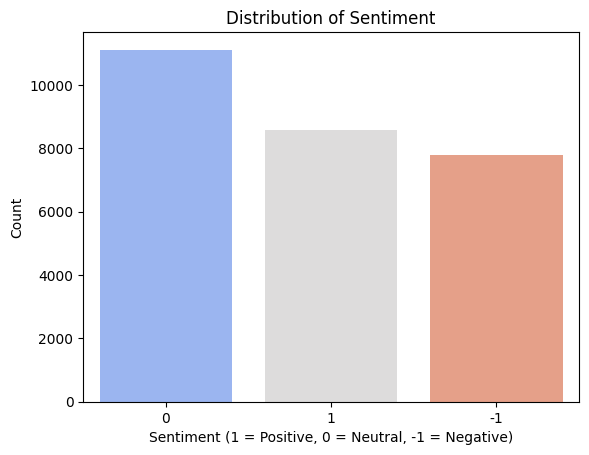

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load Dataset
# Pastikan file train.csv berada di direktori kerja Anda
twitter_df = pd.read_csv('/content/train.csv')

# Step 2: Periksa Kolom Sentiment
print("Unique values in 'sentiment' column before mapping:")
print(twitter_df['sentiment'].unique())  # Menampilkan nilai unik

# Step 3: Tangani Nilai Kosong (NaN) Jika Ada
# Jika ada nilai NaN, ganti dengan nilai default (misalnya, 'neutral')
twitter_df['sentiment'] = twitter_df['sentiment'].fillna('neutral')

# Step 4: Map Sentiment Values
# Ubah 'positive', 'neutral', 'negative' menjadi 1, 0, -1
twitter_df['sentiment'] = twitter_df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Step 5: Verifikasi Hasil Mapping
print("\nUnique values in 'sentiment' column after mapping:")
print(twitter_df['sentiment'].unique())

# Step 6: Visualisasi Distribusi Sentimen
sns.countplot(data=twitter_df, x='sentiment', order=twitter_df['sentiment'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment (1 = Positive, 0 = Neutral, -1 = Negative)')
plt.ylabel('Count')
plt.show()


In [14]:
pip install wordcloud

In [15]:
from wordcloud import WordCloud

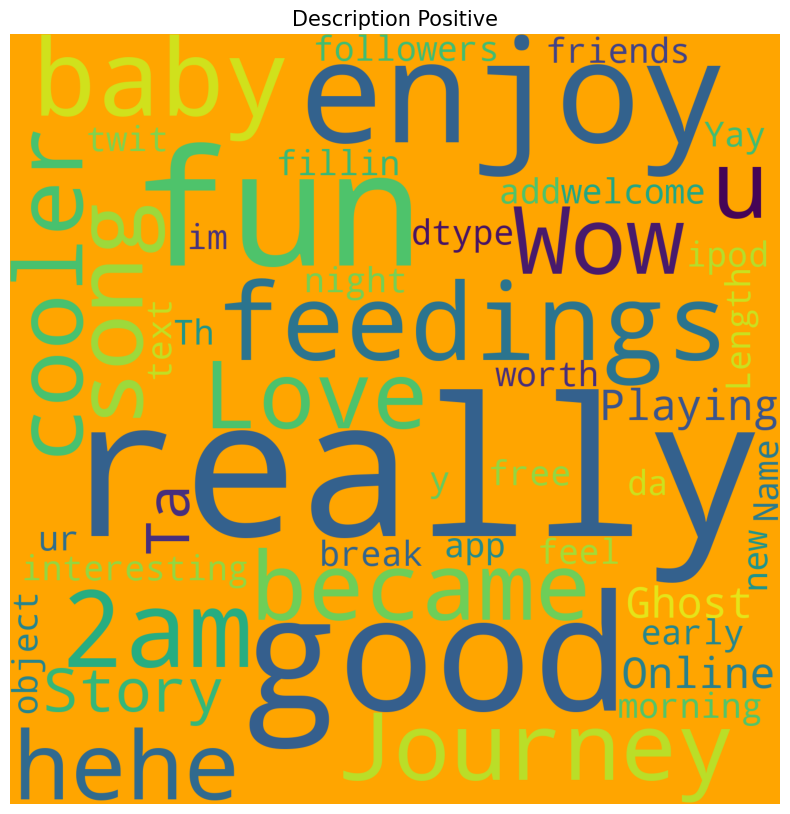

In [16]:
positive = twitter_df[twitter_df['sentiment'] == 1]
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('fast')
wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(positive['text']))
plt.title('Description Positive', fontsize = 15)
plt.imshow(wc)
plt.axis('off')
plt.show()

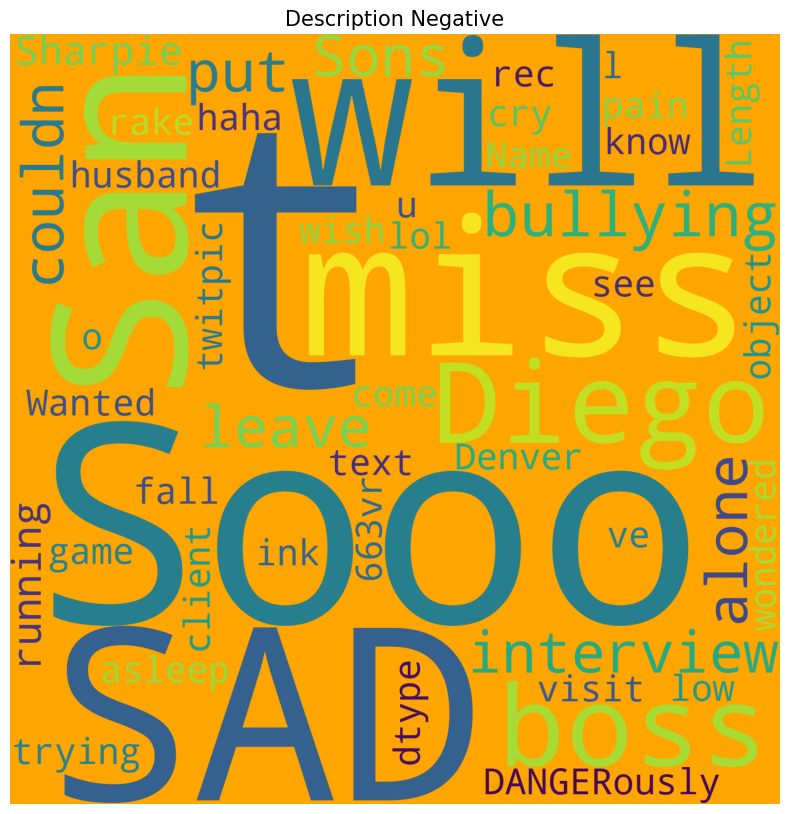

In [17]:
negative = twitter_df[twitter_df['sentiment'] == -1]
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('fast')
wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(negative['text']))
plt.title('Description Negative', fontsize = 15)
plt.imshow(wc)
plt.axis('off')
plt.show()

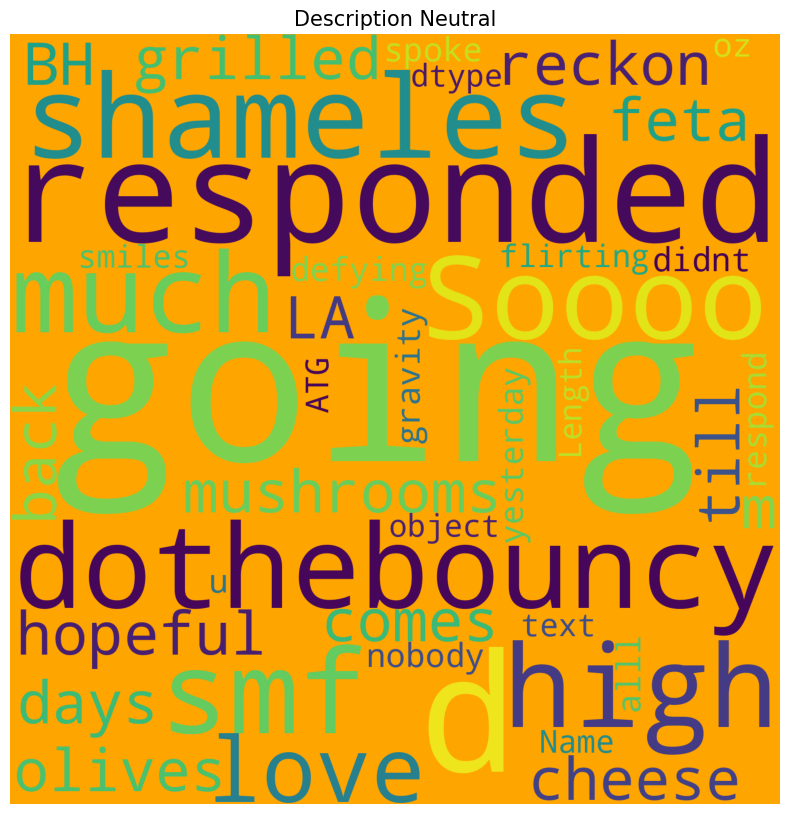

In [18]:
neutral = twitter_df[twitter_df['sentiment'] == 0]
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('fast')
wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(neutral['text']))
plt.title('Description Neutral', fontsize = 15)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [22]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import nltk

# Download stopwords jika belum
nltk.download('stopwords')

# Membaca dataset
twitter_df = pd.read_csv('train.csv')

# Memastikan kolom teks (text) tidak kosong
x = twitter_df['text'].dropna().tolist()

# Variabel corpus untuk menyimpan hasil preprocessing
corpus = []

# Loop untuk preprocessing teks
for i in range(0, len(x)):
    # Menghapus mentions (@username)
    twitter = re.sub(r"@[A-Za-z0-9]+", " ", x[i])

    # Menghapus hyperlink
    twitter = re.sub(r"https?://[A-Za-z0-9./]+", " ", twitter)

    # Menghapus karakter selain alfabet
    twitter = re.sub(r"[^a-zA-Z.!?]", " ", twitter)

    # Menghapus spasi berlebih
    twitter = re.sub(r"\s+", " ", twitter)

    # Tokenisasi (split teks menjadi daftar kata)
    twitter = twitter.split()

    # Menginisialisasi PorterStemmer
    ps = PorterStemmer()

    # Menghapus stopwords dan melakukan stemming
    twitter = [ps.stem(word) for word in twitter if word not in set(stopwords.words('english'))]

    # Menggabungkan kata-kata menjadi teks kembali
    twitter = " ".join(twitter)

    # Menambahkan hasil preprocessing ke corpus
    corpus.append(twitter)

# Menggunakan CountVectorizer untuk ekstraksi fitur
cv = CountVectorizer(stop_words='english')
x_vectorized = cv.fit_transform(corpus)

# Menampilkan hasil
print(f"Shape of vectorized data: {x_vectorized.shape}")
print(f"Feature names: {cv.get_feature_names_out()[:10]}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Shape of vectorized data: (27480, 21111)
Feature names: ['aa' 'aaa' 'aaaa' 'aaaaaaaaaaa' 'aaaaaaaaaahhhhhhhh' 'aaaaaaaaaamaz'
 'aaaaaaaafternoon' 'aaaaaaaahhhhhhhh' 'aaaaaah' 'aaaaaahhhhhhhh']


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Membaca dataset
twitter_df = pd.read_csv('/content/train.csv')

# Menghapus baris dengan NaN di kolom 'text' atau 'sentiment'
twitter_df = twitter_df.dropna(subset=['text', 'sentiment'])

# Mengambil teks (x) dan sentiment (y)
x = twitter_df['text'].tolist()
y = twitter_df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Membagi data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=5)

# Menampilkan bentuk data setelah pembagian
print(f"Training data size: {len(x_train)}")
print(f"Test data size: {len(x_test)}")


Training data size: 21984
Test data size: 5496


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Membaca dataset
twitter_df = pd.read_csv('/content/train.csv')

# Menghapus baris dengan NaN di kolom 'text' atau 'sentiment'
twitter_df = twitter_df.dropna(subset=['text', 'sentiment'])

# Mengambil teks (x) dan sentiment (y)
x = twitter_df['text'].tolist()
y = twitter_df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Membagi data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=5)

# Vectorizing teks menggunakan CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
x_train_vectorized = vectorizer.fit_transform(x_train)  # Hanya fit dan transform pada x_train
x_test_vectorized = vectorizer.transform(x_test)        # Transform hanya pada x_test

# Mengecek ukuran data untuk memastikan konsistensi
print(f"Shape of x_train_vectorized: {x_train_vectorized.shape}")
print(f"Shape of y_train: {y_train.shape}")

# Membuat model dan melatihnya
model = MultinomialNB()
model.fit(x_train_vectorized, y_train)

# Menampilkan hasil model setelah pelatihan
print("Model trained successfully.")


Shape of x_train_vectorized: (21984, 22766)
Shape of y_train: (21984,)
Model trained successfully.


Accuracy: 0.6372
Precision: 0.6418
Recall: 0.6372
F1-Score: 0.6374

Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.57      0.61      1556
           0       0.58      0.66      0.62      2223
           1       0.69      0.68      0.68      1717

    accuracy                           0.64      5496
   macro avg       0.65      0.63      0.64      5496
weighted avg       0.64      0.64      0.64      5496



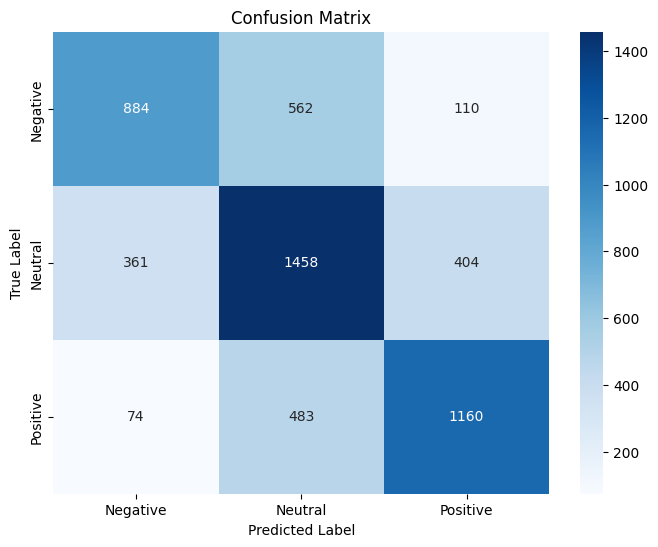

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat prediksi untuk data uji
y_pred = model.predict(x_test_vectorized)

# Evaluasi kinerja
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Menggunakan average='weighted' untuk multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()